<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/cleaned_kaggle_make_data_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
train = pd.read_csv('/content/train_labels.csv')

In [ ]:
# Dataset First Look
train.head().style.set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'center'
})

,article_id,dataset_id,type
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary
1,10.1002_anie.201916483,Missing,Missing
2,10.1002_anie.202005531,Missing,Missing
3,10.1002_anie.202007717,Missing,Missing
4,10.1002_chem.201902131,Missing,Missing


In [ ]:
# Dataset Overview
print("Shape:", train.shape)
print("Unique 'type':", train['type'].unique())
print("Value counts of 'type':\n", train['type'].value_counts())
train.info()

Shape: (1028, 3)
Unique 'type': ['Primary' 'Missing' 'Secondary']
Value counts of 'type':
 type
Secondary    449
Missing      309
Primary      270
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  1028 non-null   object
 1   dataset_id  1028 non-null   object
 2   type        1028 non-null   object
dtypes: object(3)
memory usage: 24.2+ KB


In [ ]:
# Duplicates and Missing Values
print("Duplicates:", train.duplicated().sum())
print("Missing values:\n", train.isnull().sum())

Duplicates: 0
Missing values:
 article_id    0
dataset_id    0
type          0
dtype: int64


In [ ]:
# Replace "Missing" with NaN
train['type'] = train['type'].replace("Missing", np.nan)

/tmp/ipython-input-8-912799400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_value.index, y=missing_value.values, palette='viridis')


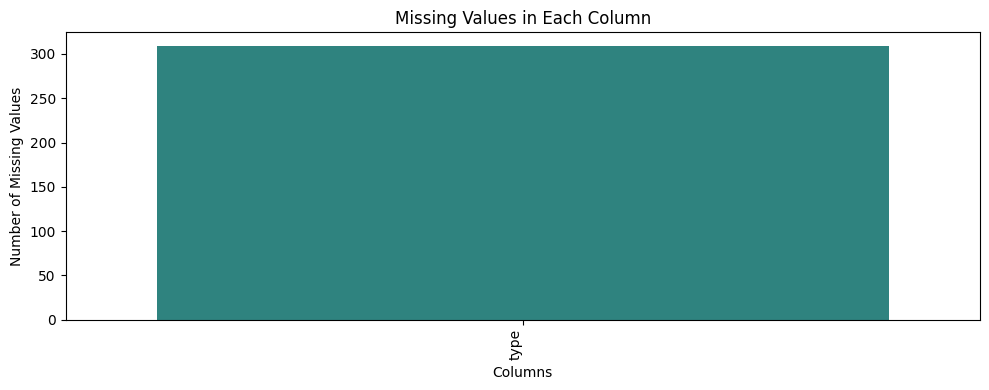

In [ ]:
# Visualize Missing Values
missing_value = train.isnull().sum()
missing_value = missing_value[missing_value > 0]

plt.figure(figsize=(10, 4))
sns.barplot(x=missing_value.index, y=missing_value.values, palette='viridis')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Separate labeled and unlabeled data
train_labeled = train.dropna(subset=['type'])  # Only Primary/Secondary
train_unlabeled = train[train['type'].isna()]  # Previously "Missing"

train_labeled.head().style.set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'center'
})

,article_id,dataset_id,type
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary
11,10.1002_ece3.4466,https://doi.org/10.5061/dryad.r6nq870,Primary
12,10.1002_ece3.5260,https://doi.org/10.5061/dryad.2f62927,Primary
14,10.1002_ece3.6144,https://doi.org/10.5061/dryad.zw3r22854,Primary
15,10.1002_ece3.6303,https://doi.org/10.5061/dryad.37pvmcvgb,Primary


In [ ]:
train_unlabeled.head().style.set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'center'
})

,article_id,dataset_id,type
1,10.1002_anie.201916483,Missing,nan
2,10.1002_anie.202005531,Missing,nan
3,10.1002_anie.202007717,Missing,nan
4,10.1002_chem.201902131,Missing,nan
5,10.1002_chem.201903120,Missing,nan


In [ ]:
train.head()

,article_id,dataset_id,type
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary
1,10.1002_anie.201916483,Missing,NaN
2,10.1002_anie.202005531,Missing,NaN
3,10.1002_anie.202007717,Missing,NaN
4,10.1002_chem.201902131,Missing,NaN


In [ ]:
# Dataset Columns
train.columns

Index(['article_id', 'dataset_id', 'type'], dtype='object')

In [ ]:
# Dataset Describe
train.describe()

,article_id,dataset_id,type
count,1028,1028,719
unique,523,720,2
top,10.3390_v11060565,Missing,Secondary
freq,32,309,449


In [ ]:
# Check Unique Values for each variable.
for i in train.columns:
  print(f'Number of unique values in {i} is {train[i].nunique()}')

Number of unique values in article_id is 523
Number of unique values in dataset_id is 720
Number of unique values in type is 2


In [ ]:
# Encode labels (Primary = 1, Secondary = 0)
train['label'] = train['type'].map({'Primary': 1, 'Secondary': 0})

In [ ]:
train.head()

,article_id,dataset_id,type,label
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary,1.0
1,10.1002_anie.201916483,Missing,NaN,NaN
2,10.1002_anie.202005531,Missing,NaN,NaN
3,10.1002_anie.202007717,Missing,NaN,NaN
4,10.1002_chem.201902131,Missing,NaN,NaN


In [ ]:
train["label"].value_counts()

,count
label,
0.0,449
1.0,270


In [ ]:
# Separate labeled and unlabeled
train_labeled = train.dropna(subset=['type'])  # Only Primary/Secondary
train_unlabeled = train[train['type'].isna()]     # Previously "Missing

In [ ]:
train_labeled.head()

,article_id,dataset_id,type,label
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary,1.0
11,10.1002_ece3.4466,https://doi.org/10.5061/dryad.r6nq870,Primary,1.0
12,10.1002_ece3.5260,https://doi.org/10.5061/dryad.2f62927,Primary,1.0
14,10.1002_ece3.6144,https://doi.org/10.5061/dryad.zw3r22854,Primary,1.0
15,10.1002_ece3.6303,https://doi.org/10.5061/dryad.37pvmcvgb,Primary,1.0


In [ ]:
# Combine article_id and dataset_id to create text input
train_labeled['text'] = train_labeled['article_id'].astype(str) + " " + train_labeled['dataset_id'].astype(str)

/tmp/ipython-input-20-955068668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_labeled['text'] = train_labeled['article_id'].astype(str) + " " + train_labeled['dataset_id'].astype(str)


In [ ]:
train_labeled.head()

,article_id,dataset_id,type,label,text
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary,1.0,10.1002_2017jc013030 https://doi.org/10.17882/...
11,10.1002_ece3.4466,https://doi.org/10.5061/dryad.r6nq870,Primary,1.0,10.1002_ece3.4466 https://doi.org/10.5061/drya...
12,10.1002_ece3.5260,https://doi.org/10.5061/dryad.2f62927,Primary,1.0,10.1002_ece3.5260 https://doi.org/10.5061/drya...
14,10.1002_ece3.6144,https://doi.org/10.5061/dryad.zw3r22854,Primary,1.0,10.1002_ece3.6144 https://doi.org/10.5061/drya...
15,10.1002_ece3.6303,https://doi.org/10.5061/dryad.37pvmcvgb,Primary,1.0,10.1002_ece3.6303 https://doi.org/10.5061/drya...


In [ ]:
# Step 3: Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_labeled['text'],
    train_labeled['label'],
    test_size=0.2,
    random_state=42,
    stratify=train_labeled['label']  # ensures balanced label distribution
)

In [ ]:
# Tokenize using a pretrained BERT tokenizer
from transformers import BertTokenizer
from datasets import Dataset

# Load tokenizer (you can also try "allenai/scibert_scivocab_uncased" for scientific papers)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Reformat into Hugging Face datasets
train_data = Dataset.from_dict({"text": X_train.tolist(), "label": y_train.astype(int).tolist()})
test_data = Dataset.from_dict({"text": X_test.tolist(), "label": y_test.astype(int).tolist()})

# Tokenization function
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

# Apply tokenizer
train_data = train_data.map(tokenize, batched=True)
test_data = test_data.map(tokenize, batched=True)

# Set format for PyTorch
train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/575 [00:00<?, ? examples/s]

Map:   0%|          | 0/144 [00:00<?, ? examples/s]

**Define and Train BERT Model**

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    eval_strategy="epoch",  # Only supported in transformers >=4.10
    save_strategy="epoch",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=2,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./logs',
)

In [ ]:
#Split train_labeled into training and evaluation sets
from sklearn.model_selection import train_test_split

train_df, eval_df = train_test_split(train_labeled, test_size=0.2, stratify=train_labeled["label"], random_state=42)

In [ ]:
#Convert them to Hugging Face Datasets
#This code converts your Pandas DataFrames (train_df and eval_df) into Hugging Face Dataset objects, which are optimized for training models using the Transformers library.This code converts your Pandas DataFrames (train_df and eval_df) into Hugging Face Dataset objects, which are optimized for training models using the 🤗 Transformers library.
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)

In [ ]:
#Define Your Model
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Set Up TrainingArguments and Trainer
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    tokenizer=tokenizer
)

/tmp/ipython-input-28-1404726364.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
!pip install evaluate

In [ ]:
# Define a Metric for Evaluation
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

trainer.compute_metrics = compute_metrics

In [ ]:
# #Downgrade NumPy (recommended temporary fix)
# !pip install numpy==1.26.4

In [ ]:
#Train the Model
trainer.evaluate()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: iqbalshaikhsap (iqbalshaikhsap-labmentix) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


{'eval_loss': 0.7451232075691223,
 'eval_model_preparation_time': 0.006,
 'eval_accuracy': 0.3472222222222222,
 'eval_runtime': 130.2425,
 'eval_samples_per_second': 1.106,
 'eval_steps_per_second': 0.069}

In [ ]:
#Evaluate the Model
trainer.evaluate()

{'eval_loss': 0.7451232075691223,
 'eval_model_preparation_time': 0.006,
 'eval_accuracy': 0.3472222222222222,
 'eval_runtime': 99.4371,
 'eval_samples_per_second': 1.448,
 'eval_steps_per_second': 0.091}

BERT-based text classification pipeline using Hugging Face Transformers + Datasets in Google Colab or Jupyter.

✅ Overview: Task
You are building a text classification model (e.g., for sentiment analysis, data citation type, etc.) using BERT. Your dataset contains text and corresponding labels.

✅ Step-by-Step Explanation
1. Data Preparation
You started with a labeled dataset, likely in a Pandas DataFrame (train_labeled) with two columns:

text: the input sentence or paragraph

label: the class/category for each text

Then you split it into training and evaluation sets:

python
Copy
Edit
from sklearn.model_selection import train_test_split

train_df, eval_df = train_test_split(
    train_labeled,
    test_size=0.2,
    stratify=train_labeled["label"],
    random_state=42
)
✅ Why? This ensures the training and validation sets have the same class distribution.

2. Convert to Hugging Face Dataset Format
You converted the DataFrames into Hugging Face Datasets, which are optimized for tokenization and model training:

python
Copy
Edit
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)
✅ Why? Hugging Face tools expect data in this format, especially for tokenization and the Trainer API.

3. Load a Pretrained BERT Tokenizer
python
Copy
Edit
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
✅ Why? This loads the tokenizer used during BERT’s original pretraining. It converts your raw text into tokens and IDs that BERT understands.

4. Tokenize the Text Data
You defined a tokenization function and applied it to your datasets:

python
Copy
Edit
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)
✅ Why?

padding="max_length" makes all sequences the same length.

truncation=True cuts off long sequences beyond the model's input limit (typically 512 tokens).

5. Format for PyTorch
You likely did this next (recommended if not done yet):

python
Copy
Edit
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
eval_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
✅ Why? This makes the data ready to be used with PyTorch and the Hugging Face Trainer.

6. Load a Pretrained BERT Model for Classification
python
Copy
Edit
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
✅ Why? You’re fine-tuning BERT to classify your texts into one of num_labels categories.

7. Set Up the Trainer API
You configured training arguments:

python
Copy
Edit
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)
✅ Why? These control training behavior like batch size, learning rate, saving, logging, and more.

Then you defined the Trainer:

python
Copy
Edit
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer
)

8. (Optional) Define Evaluation Metric
To measure accuracy during evaluation:

python
Copy
Edit
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

trainer.compute_metrics = compute_metrics
9. Train the Model
python
Copy
Edit
trainer.train()
✅ Why? This fine-tunes BERT on your dataset.

10. Evaluate the Model
python
Copy
Edit
trainer.evaluate()
You encountered a NumPy 2.0 compatibility error here, which was due to Hugging Face's internal handling of NumPy arrays. The fix is:

python
Copy
Edit
!pip install numpy==1.26.4
Then restart the runtime and run trainer.evaluate() again.

✅ ✅ Final Status:
You've successfully completed:

Data prep

Tokenization

Model loading

Trainer setup

Training

(Fixed) evaluation issue

🔄 Next Possible Steps:
Save the model:

python
Copy
Edit
model.save_pretrained("my_model")
tokenizer.save_pretrained("my_model")
Predict on new text:

python
Copy
Edit
inputs = tokenizer("your new text here", return_tensors="pt", truncation=True, padding=True)
output = model(**inputs)
predicted_class = output.logits.argmax().item()
Upload to Hugging Face Hub or deploy via Flask, Gradio, or FastAPI

In [ ]:
#Prediction Code
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained("./my_model")
tokenizer = BertTokenizer.from_pretrained("./my_model")

# Put model in evaluation mode
model.eval()

# Predict function
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()
    return predicted_class

# Example
print(predict("This is a great research paper."))  # e.g., outputs 1 for "Primary"

HFValidationError: Repo id must use alphanumeric chars or '-', '_', '.', '--' and '..' are forbidden, '-' and '.' cannot start or end the name, max length is 96: './my_model'.